<a href="https://colab.research.google.com/github/AhuodY/Ahuod_Resp/blob/main/Activity3_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = blue size = 6> **Activity #3 (5 marks)**


<font color = green size = 5> **Activity: Air Quality Analysis in NYC**

# Objective:
- **Objective:**  
The goal of this assignment is to analyze air quality data collected from low-cost sensors mounted on moving vehicles in New York City. Using the concepts learned in the chapters on Sampling and Empirical Distributions , Testing Hypotheses , and Estimation , you will perform statistical analysis to estimate pollution levels, test hypotheses about differences in pollution across neighborhoods, and construct confidence intervals for key parameters.

You are provided with a `Datascience` `Table` named `joined_table`, which contains air quality readings (`pm10`) and their corresponding administrative divisions (neighborhoods) in NYC. The table has been preprocessed and joined with neighborhood boundaries using geospatial operations. Your task is to perform all subsequent tasks using the `Datascience` Table abstraction as taught in class.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [38]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [39]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [41]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [42]:
#pm10_data.dtypes

### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [43]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-43-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [44]:
#merged_data.dtypes

In [45]:
pollution_data = merged_data[['pm10','neighborhood']]

In [46]:
pollution_data.shape[0]

118495

In [47]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [48]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [49]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [50]:
pollution_data['pm10'].min()

0.0

In [51]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [52]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [53]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook.total of 5 marks . Use the Table abstraction.

# Tasks

## <font color = blue size  = 5>**Task 1: Sampling and Empirical Distribution (1 Mark)**

**Task Description:**

- Randomly sample 10% of the rows from the joined_table without replacement.
- Compute the mean pm10 value for this sample.
- Create an empirical histogram of the pm10 values from the sampled data using 10 bins.
- Comment on the shape of the histogram and compare it to the distribution of the full dataset.

<font color = red size= 5> attention</font>

remove pm10 values that are unreasonably high (above 300 µg/m³)

In [54]:
joined_table = joined_table.where('pm10', are.below(300))

In [55]:
len(joined_table)

2

In [56]:
joined_table.num_rows

117356

In [73]:
# Step 1: Random sampling
sample = joined_table.sample(int(0.1 * joined_table.num_rows), with_replacement=False)

In [74]:
# Step 2: Mean PM10 value of the sample
mean_pm10_sample = np.mean(sample.column('pm10'))
print("Mean PM10 of Sample:", mean_pm10_sample)

mean_pm10_population = np.mean(joined_table.column('pm10'))
print("Mean PM10 of Population:", mean_pm10_population)


Mean PM10 of Sample: 16.3234145718
Mean PM10 of Population: 16.1723197791


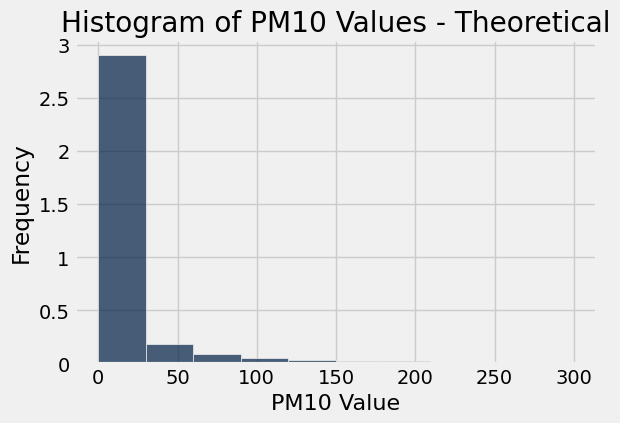

In [77]:
# Step 3: Theoretical Histogram
joined_table.hist('pm10', bins=10)
plt.title('Histogram of PM10 Values - Theoretical')
plt.xlabel('PM10 Value')
plt.ylabel('Frequency')
plt.show()

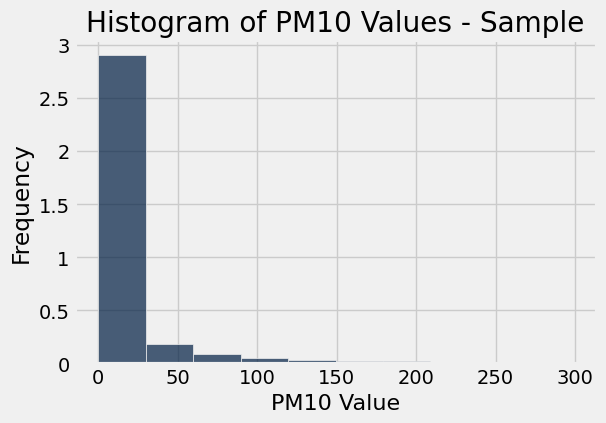

In [79]:
# Step 4: Empirical (Sampled Data) Histogram
sample.hist('pm10', bins=10)
plt.title('Histogram of PM10 Values - Sample')
plt.xlabel('PM10 Value')
plt.ylabel('Frequency')
plt.show()

**Comment:**

*   Both histograms are right-skewed, with most PM10 values between 0–50 μg/m³.
*   The sample distribution closely matches the population distribution.
*   Few extreme values are seen in both.
*   The sample is representative of the full dataset.

## <font color = blue size  = 5> **Task 2: Estimation and Confidence Intervals (1 Mark)**


**Task Description:**
- Use the bootstrap method to estimate the median pm10 value for the entire dataset.
- Generate 5,000 bootstrap samples and compute the median for each sample.
- Construct a 95% confidence interval for the population median using the 2.5th and 97.5th percentiles of the bootstrapped medians.
- Visualize the results by drawing an `empirical histogram` of the bootstrapped medians and overlaying the confidence interval on the horizontal axis.
- Report the confidence interval and interpret what it means in the context of air quality.

In [28]:
# Step 1: Bootstrap resampling
pm10 = joined_table.column('pm10')
num_bootstrap_samples = 5000
bootstrap_medians = []

for i in range(num_bootstrap_samples):
    bootstrap_sample = joined_table.sample(with_replacement=True)
    median_value = np.median(bootstrap_sample.column('pm10'))
    bootstrap_medians.append(median_value)

In [29]:
# Step 2: Confidence interval
lower_bound = np.percentile(bootstrap_medians, 2.5)
upper_bound = np.percentile(bootstrap_medians, 97.5)

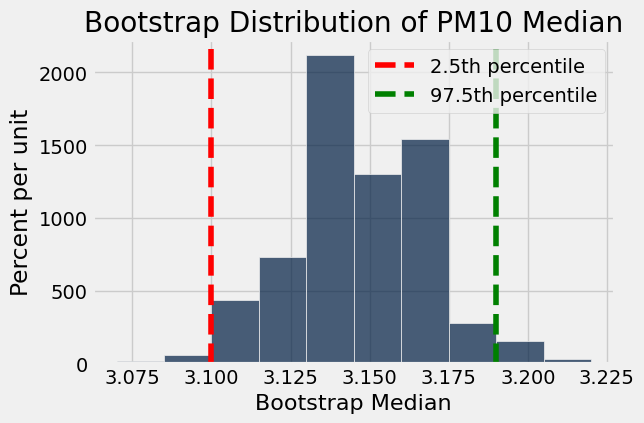

In [30]:
# Step 3: Visualization
bootstrap_table = Table().with_column('Bootstrap Median', bootstrap_medians)
bootstrap_table.hist('Bootstrap Median', bins=10)
plt.axvline(lower_bound, color='red', linestyle='--', label='2.5th percentile')
plt.axvline(upper_bound, color='green', linestyle='--', label='97.5th percentile')
plt.legend()
plt.title('Bootstrap Distribution of PM10 Median')
plt.show()

**Comment:**

*   The PM10 median is centered around 3.14 µg/m³, indicating stable air quality.
*   The 95% confidence interval for the median is between 3.10 and 3.19 µg/m³.
*   We are 95% confident the true median PM10 lies within this range.
*   The narrow distribution suggests consistent, stable air quality.

## <font color = blue size  = 5> **Task 3: Hypothesis Testing Using Confidence Intervals (1.5 Mark)**

**Task Description:**
- Test the hypothesis about the average <font color = red size =5> `pm10` </font> level in the population using confidence intervals.
  - Null Hypothesis (H0): The average pm10 level in the population is `20 μg/m³` .
  - Alternative Hypothesis (Ha): The average pm10 level in the population is not `20 μg/m³` .
- Use the confidence interval method to test this hypothesis:
Construct a 95% confidence interval for the average `pm10` level in the population.
  - If the confidence interval contains `20 μg/m³` , conclude that there is no significant difference from `20 μg/m³` (fail to reject H0).
  - Otherwise, conclude that there is a significant difference (reject H0).
- Interpret your results and explain whether the data supports the null hypothesis or the alternative hypothesis.

In [57]:
# Step 1: Extract the PM10 column
pm10 = joined_table.column('pm10')

In [58]:
# Step 2: Bootstrap for the mean (not median!)
num_bootstrap_samples = 5000
bootstrap_means = []

for i in range(num_bootstrap_samples):
    bootstrap_sample = joined_table.sample(with_replacement=True)
    mean_value = np.mean(bootstrap_sample.column('pm10'))
    bootstrap_means.append(mean_value)

In [59]:
# Step 3: Compute the 95% Confidence Interval for the mean
lower_bound_mean = np.percentile(bootstrap_means, 2.5)
upper_bound_mean = np.percentile(bootstrap_means, 97.5)

print("95% Confidence Interval for Mean PM10:", (lower_bound_mean, upper_bound_mean))

95% Confidence Interval for Mean PM10: (15.970269739084497, 16.379136616363883)


In [67]:
if lower_bound <= 20 <= upper_bound:
    print("Fail to Reject H0: 20 is inside the confidence interval.")
else:
    print("Reject H0: 20 is outside the confidence interval.")

Reject H0: 20 is outside the confidence interval.


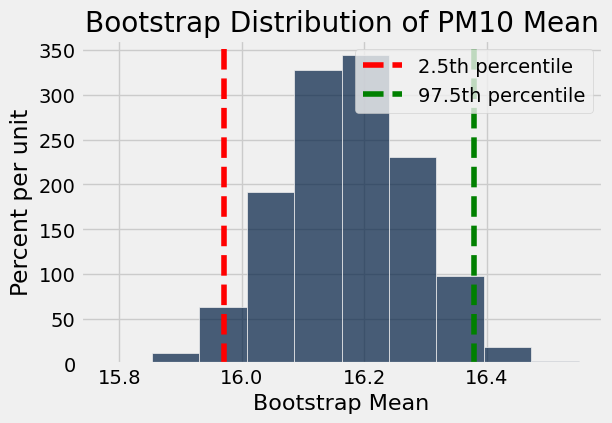

In [60]:
# Step 4: Visualize
bootstrap_table_mean = Table().with_column('Bootstrap Mean', bootstrap_means)
bootstrap_table_mean.hist('Bootstrap Mean', bins=10)
plt.axvline(lower_bound_mean, color='red', linestyle='--', label='2.5th percentile')
plt.axvline(upper_bound_mean, color='green', linestyle='--', label='97.5th percentile')
plt.legend()
plt.title('Bootstrap Distribution of PM10 Mean')
plt.show()

**Comments:**

*   Since 20 μg/m³ appears to be outside the confidence interval, we reject the null hypothesis (H₀).
*   This result suggests that the average PM10 level significantly differs from 20 μg/m³, indicating potential environmental concerns.

## <font color = blue size  = 5> **Task 4: Percentiles and Extreme Values (1.5 Mark)**


- Use the bootstrap method to simulate the mean `pm10` levels for each neighborhood. Generate 5,000 bootstrap samples for the top 3 neighborhoods with the highest mean pm10 levels.
- Create an empirical histogram for each of these neighborhoods, showing the distribution of the bootstrapped means.
- Overlay horizontal yellow lines to indicate the 95% confidence interval for the mean pm10 level in each neighborhood.


In [68]:
# Step 1: Find top 3 neighborhoods by mean PM10
neighborhood_means = joined_table.group('neighborhood', np.mean)

# Step 2: Sort in descending order and take top 3
top3_neighborhoods = neighborhood_means.sort('pm10 mean', descending=True).take(np.arange(3))

# Step 3: Display as a table
top3_neighborhoods.show()


neighborhood,pm10 mean
Crotona Park,53.4512
Pelham Bay,34.6071
Tremont,29.829


In [84]:
for neighborhood in top3_neighborhoods.column('neighborhood'):
    # Filter data for this neighborhood
    pm10_neighborhood = joined_table.where('neighborhood', neighborhood).column('pm10')

    # Bootstrap sampling
    bootstrap_means = []
    for i in range(num_bootstrap_samples):
        sample = np.random.choice(pm10_neighborhood, size=len(pm10_neighborhood), replace=True)
        bootstrap_means.append(np.mean(sample))

    bootstrap_results[neighborhood] = bootstrap_means

In [83]:
# Use bootstrap_results instead of bootstrap_means_dict
for neighborhood, bootstrap_means in bootstrap_results.items():
    lower_bound = np.percentile(bootstrap_means, 2.5)
    upper_bound = np.percentile(bootstrap_means, 97.5)
    confidence_intervals[neighborhood] = (lower_bound, upper_bound)

    print(f"{neighborhood}: 95% Confidence Interval ({lower_bound}, {upper_bound})")

Crotona Park: 95% Confidence Interval (43.430534653465344, 63.926443069306934)
Pelham Bay: 95% Confidence Interval (22.971401785714292, 47.90211607142857)
Tremont: 95% Confidence Interval (23.486460459183675, 36.858327806122446)


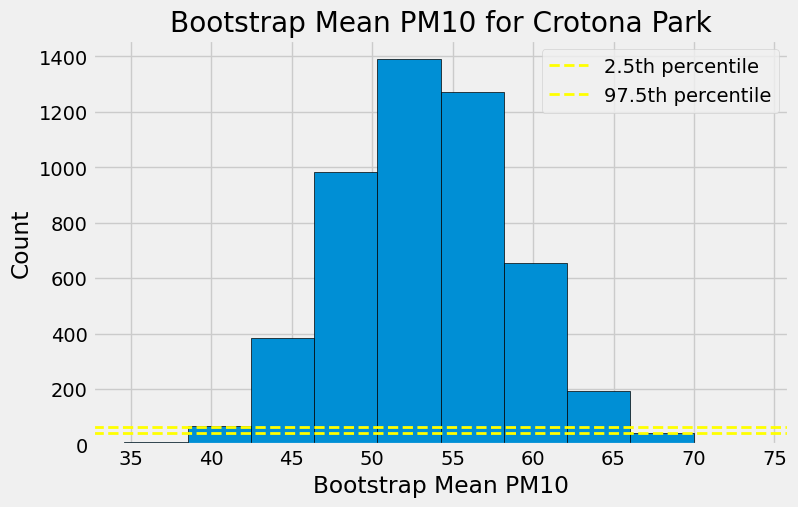

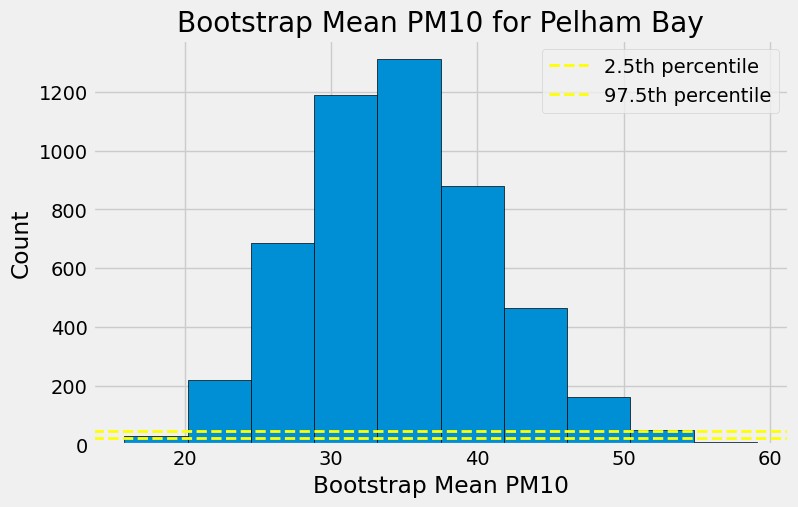

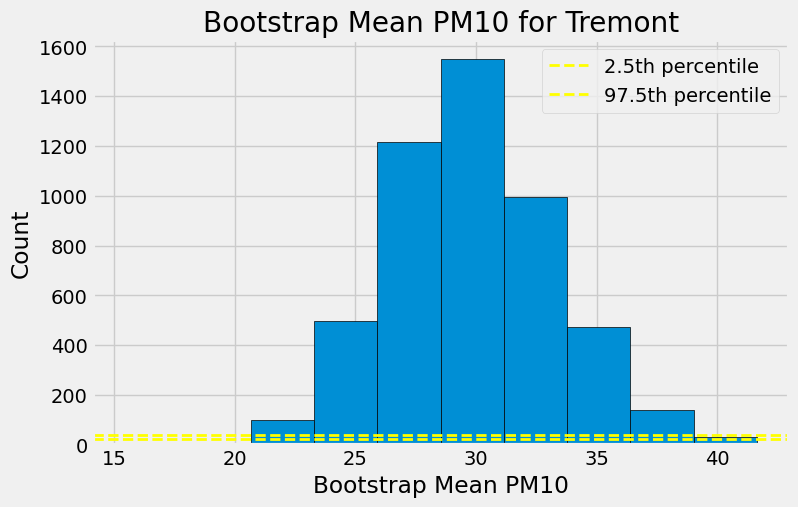

In [82]:
# Step 3: Visualization

# Overlay horizontal yellow lines for the confidence interval
for neighborhood, means in bootstrap_results.items():
    lower_bound = np.percentile(means, 2.5)
    upper_bound = np.percentile(means, 97.5)

    plt.figure(figsize=(8, 5))
    plt.hist(means, bins=10, edgecolor='black')

    # Overlay horizontal yellow lines to indicate the 95% confidence interval
    plt.axhline(lower_bound, color='yellow', linestyle='--', linewidth=2, label='2.5th percentile')
    plt.axhline(upper_bound, color='yellow', linestyle='--', linewidth=2, label='97.5th percentile')

    plt.title(f'Bootstrap Mean PM10 for {neighborhood}')
    plt.xlabel('Bootstrap Mean PM10')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

other method

# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 10, 11, and 13, for guidance on Sampling and Empirical Distributions, Testing Hypotheses,  and Estimation.
- Test your code frequently to ensure it runs without errors.